# Latar Belakang

Sebuah perusahaan fiktif SAAS (*Software as a Service*) menyediakan perangkat lunak pemasaran dan penjualan. Perusahaan ini menjual produknya, yang berupa lisensi perangkat lunak, kepada perusahaan-perusahaan lain. Harga produk pada tiap transaksi bisa berbeda, sehingga pembelian produk yang sama dengan jumlah yang sama bisa memiliki total harga yang berbeda. Hal ini menyebabkan keuntungan dari masing-masing transaksi tidak hanya dipengaruhi oleh jenis produk dan jumlahnya. Hal ini juga memungkinan terjadinya transaksi dengan keuntungan negatif, yang merupakan kerugian bagi perusahaan.

## Pernyataan Masalah

Perusahaan ingin mengetahui transaksi seperti apa yang memberikan keuntungan besar. Informasi ini dapat membantu perusahaan untuk menentukan keputusan yang bisa meningkatkan pendapatan perusahaan, seperti strategi pemasaran, kriteria perusahaan untuk diajak bermitra, dan besar diskon yang diberikan saat bertransaksi.

Sebagai *data analyst* perusahaan fiktif ini, kita akan menocba menjawab pertanyaan berikut:
Apa kriteria transaksi yang memberikan keuntungan yang besar, khususnya yang lebih dari rata-rata keuntungan.

# Data

Untuk menjawab pertanyaan tersebut, kita akan menggunakan data transaksi perusahaan fiktif tersebut. Data yang digunakan dapat diunduh di [sini](https://www.kaggle.com/datasets/nnthanh101/aws-saas-sales).

## Data Understanding

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

In [2]:
DF=pd.read_csv('SaaS-Sales.csv')
display(DF)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


Dataset ini berisi 9994 baris yang berupa informasi dari penjualan perusahaan fiktif ini. Masing-masing baris merepresentasikan satu jenis produk dari satu pemesanan. Masing-masing jenis produk yang berbeda dari pemesanan yang sama akan dicatat sebagai transaksi yang berbeda. 19 kolom dataset ini terdiri dari:

1.  Row ID: ID untuk tiap Transaksi.
2.  Order ID: ID untuk tiap pemesanan.
3.  Order Date: Tanggal pemesanan.
4.  Date Key: Representasi numerik dari tanggal pemesanan.
5.  Contact Name: Nama pemesan.
6.  Country: Negara asal pemesanan.
7.  City: Kota asal pemesanan.
8.  Region: Region asal pemesanan.
9.  Subregion: Subregion asal pemesanan.
10. Customer: Nama perusahaan pemesan.
11. Customer ID: ID perusahaan pemesan.
12. Industry: Industri perusahaan pemesan.
13. Segment: Segmen industri perusahaan pemesan.
14. Product: Produk yang dipesan.
15. License: *Key* lisensi produk yang dipesan.
16. Sales: besar penjualan untuk transaksi ini.
17. Quantity: Jumlah produk yang dipesan di transaksi ini.
18. Discount: Diskon yang diberikan untuk transaksi ini.
19. Profit: Keuntungaan dari transaksi ini.

Selanjutnya kita akan melihat informasi umum dari dataset yang digunakan, seperti tipe data dan statistik deskriptif dari masing-masing kolom.

In [ ]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [ ]:
display(DF.describe(), DF.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,229.858001,3.789574,0.156203,28.656896
std,2885.163629,1.123898e+04,29.719388,623.245101,2.225110,0.206452,234.260108
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,22638.480000,14.000000,0.800000,8399.976000


,Order ID,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,37,2001,922,4219,2507,192,2127,5191,1842,1


Berdasarkan informasi tersebut, kita dapat melihat beberapa hal:

*   Dataset memiliki 9994 baris dan 19 kolom.
*   Semua kolom berisi 9994 data tak-kosong, yang berarti tidak ada data yang kosong.
*   Kolom `Row ID` dan `License` berisi data unik, sehingga tidak relevan untuk analisis dan bisa diabaikan.
*   Kolom `Order Date` berisi data bertipe object, sedangkan akan lebih idela jika bertipe datetime. Akan kita tangani di bagian berikutnya.
*   Kolom `Date Key` berisi kode yang sesuai dengan kolom `Order Date`, sehingga bisa diabaikan.
*   Kolom `Customer ID` berisi ID unik untuk kolom `Customer`, sehingga bisa diabaikan.
*   Kolom `Sales`, `Quantity`, `Discount`, dan `Profit` memiliki jangkauan yang besar, mempertimbangkan kuartil dan jangkauan kuartilnya masing-masing. Akan kita tinjau lebih lanjut di bagian berikutnya.

Pada bagian selanjutnya, kita akan melakukan proses *data cleaning*.

## Data Cleaning

Seperti yang telah disebutkan di bagian sebelumnya, tidak ada data yang kosong. Selanjutnya, kita akan mengecek apakah ada data duplikat.

In [ ]:
DF[DF.duplicated(DF.columns.delete(0))]

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


Agar lebih yakin, kita mencari baris yang data pada semua kolomnya kecuali `Row ID` bernilai sama, dan tidak ditemukan data duplikat. Selanjutnya kita akan mengecek apakah terdapat salah ketik pada kolom-kolom yang bertipe object.

In [ ]:
#pd.set_option('display.max_colwidth', None)
DFt=DF.select_dtypes(include=[object])
UniqVal=pd.DataFrame([[x, DFt[x].nunique(),DFt[x].unique()] for x in DFt.columns],
                     columns=['Kolom','Banyak nilai unik','Nilai unik'])
UniqVal

,Kolom,Banyak nilai unik,Nilai unik
0,Order ID,5009,"[EMEA-2022-152156, AMER-2022-138688, EMEA-2021-108966, AMER-2020-115812, EMEA-2023-114412, AMER-2022-161389, APJ-2021-118983, EMEA-2020-105893, EMEA-2020-167164, AMER-2020-143336, AMER-2022-137330, EMEA-2023-156909, EMEA-2021-106320, AMER-2022-121755, EMEA-2021-150630, APJ-2023-107727, APJ-2022-117590, APJ-2021-117415, APJ-2023-120999, AMER-2022-101343, EMEA-2023-139619, EMEA-2022-118255, AMER-2020-146703, APJ-2022-169194, APJ-2021-115742, EMEA-2022-105816, EMEA-2022-111682, AMER-2021-135545, APJ-2021-164175, AMER-2020-106376, EMEA-2022-119823, EMEA-2022-106075, AMER-2023-114440, EMEA-2021-134026, APJ-2023-118038, APJ-2020-147606, EMEA-2022-127208, AMER-2020-139451, EMEA-2021-149734, APJ-2023-119662, AMER-2023-140088, EMEA-2023-155558, APJ-2022-159695, AMER-2022-109806, EMEA-2021-149587, EMEA-2023-109484, EMEA-2023-161018, AMER-2023-157833, EMEA-2022-149223, APJ-2022-158568, EMEA-2022-129903, EMEA-2021-156867, EMEA-2023-119004, APJ-2021-129476, EMEA-2023-146780, EMEA-2022-128867, AMER-2020-115259, AMER-2021-110457, EMEA-2021-136476, APJ-2022-103730, APJ-2020-152030, APJ-2020-134614, AMER-2023-107272, AMER-2022-125969, AMER-2023-164147, AMER-2022-145583, EMEA-2022-110366, AMER-2023-106180, EMEA-2023-155376, AMER-2021-110744, AMER-2020-110072, EMEA-2022-114489, AMER-2022-158834, AMER-2021-124919, AMER-2021-118948, AMER-2020-104269, APJ-2022-114104, AMER-2022-162733, EMEA-2021-119697, APJ-2022-154508, AMER-2022-113817, APJ-2020-139892, AMER-2020-118962, APJ-2020-100853, APJ-2023-152366, AMER-2021-101511, EMEA-2021-137225, APJ-2020-166191, EMEA-2020-158274, EMEA-2022-105018, AMER-2020-123260, APJ-2022-157000, EMEA-2021-102281, AMER-2021-131457, AMER-2020-140004, AMER-2023-107720, EMEA-2023-124303, AMER-2023-105074, EMEA-2020-133690, APJ-2023-116701, ...]"
1,Contact Name,793,"[Nathan Bell, Deirdre Bailey, Zoe Hodges, Thomas Hodges, Adrian Hunter, Adrian Abraham, Emily Morrison, Claire Welch, Carol Campbell, Blake Hughes, Melanie Sharp, Luke Bower, Jonathan Ferguson, Sam Parsons, Neil Gill, Amelia Campbell, Chloe Short, Jasmine Metcalfe, Karen Mathis, Dylan Dickens, Sophie Lewis, Gavin Mitchell, Katherine Dowd, Harry Brown, Brian Dickens, Joseph Newman, Nicola Howard, Stewart Wilson, Eric McLean, Leah Clarkson, Alison Davidson, Sophie Vance, Anne Lee, Maria Dyer, Julia Ellison, Gordon McLean, Jessica Buckland, Bernadette Nolan, Sonia Ince, William Lewis, Melanie Young, Edward Oliver, Peter Quinn, Max Marshall, Jan Watson, Carol Ball, Gavin Walsh, Penelope Peake, Amy Scott, Carl Jackson, Joe Wallace, Luke Mills, Alexandra Dyer, Rebecca Dickens, Audrey Hardacre, Jennifer Dowd, Natalie Sanderson, Samantha Rampling, Sally Berry, Anthony Clark, Victor Short, Austin Newman, Rose Scott, Tim Morrison, Harry Murray, Dylan Dowd, Angela Parsons, Lisa Oliver, Joseph Duncan, Paul MacDonald, Gordon Graham, Sean Bower, Anthony Sanderson, Stewart Marshall, Joanne Carr, Angela Davies, William Alsop, Owen Watson, Melanie Davidson, Warren Forsyth, Gabrielle Ogden, Justin Randall, Jack Graham, Sophie Henderson, Brian Short, Samantha Lawrence, Una Hudson, Kimberly North, Dylan Ogden, Jonathan Clark, Kevin Vaughan, Madeleine Smith, Diana Ince, Tracey Knox, Michelle McLean, Diana Bell, Jan Clark, Pippa Smith, Rebecca Wilson, Irene Smith, ...]"
2,Country,48,"[Ireland, United States, Germany, Sweden, Canada, Japan, Italy, Turkey, Costa Rica, France, Australia, Luxembourg, Brazil, Philippines, India, United Kingdom, Chile, Spain, South Africa, Portugal, Colombia, Belgium, Russia, Netherlands, Mexico, Poland, Singapore, New Zealand, Czech Republic, Saudi Arabia, Argentina, South Korea, Finland, Israel, Norway, Ukraine, United Arab Emirates, Greece, China, Austria, Indonesia, Egypt, Denmark, Croatia, Taiwan, Qatar, Slovenia, Iceland]"
3,City,262,"[Dublin, New York City, Stuttgart, Stockholm, Toronto, Saitama, Naples, Ankara, Los Angeles, San José, Paris, Istanbul, Tokyo, Aichi, Wollongong, Hanover, Luxembour

Dari sampel nilai unik yang ditampilkan, khususnya untuk kolom-kolom yang akan digunakan dalam analisis seperti `Country`, `City`, `Region`, `Subregion`, `Industry`, `Segment`, dan `Product`, tidak ditemukan salah ketik. Selanjutnya kita akan mengubah format kolom `Order Date` menjadi datetime.

In [3]:
DF['Order Date']=pd.to_datetime(DF['Order Date'])
DF['Order Date'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 9994 entries, 0 to 9993
Series name: Order Date
Non-Null Count  Dtype         
--------------  -----         
9994 non-null   datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 78.2 KB


Selanjutnya kita akan mengecek kolom `Sales`, `Quantity`, `Discount`, dan `Profit` untuk data *outlier*.

[Text(0.5, 1.0, 'Sebaran kolom Profit')]

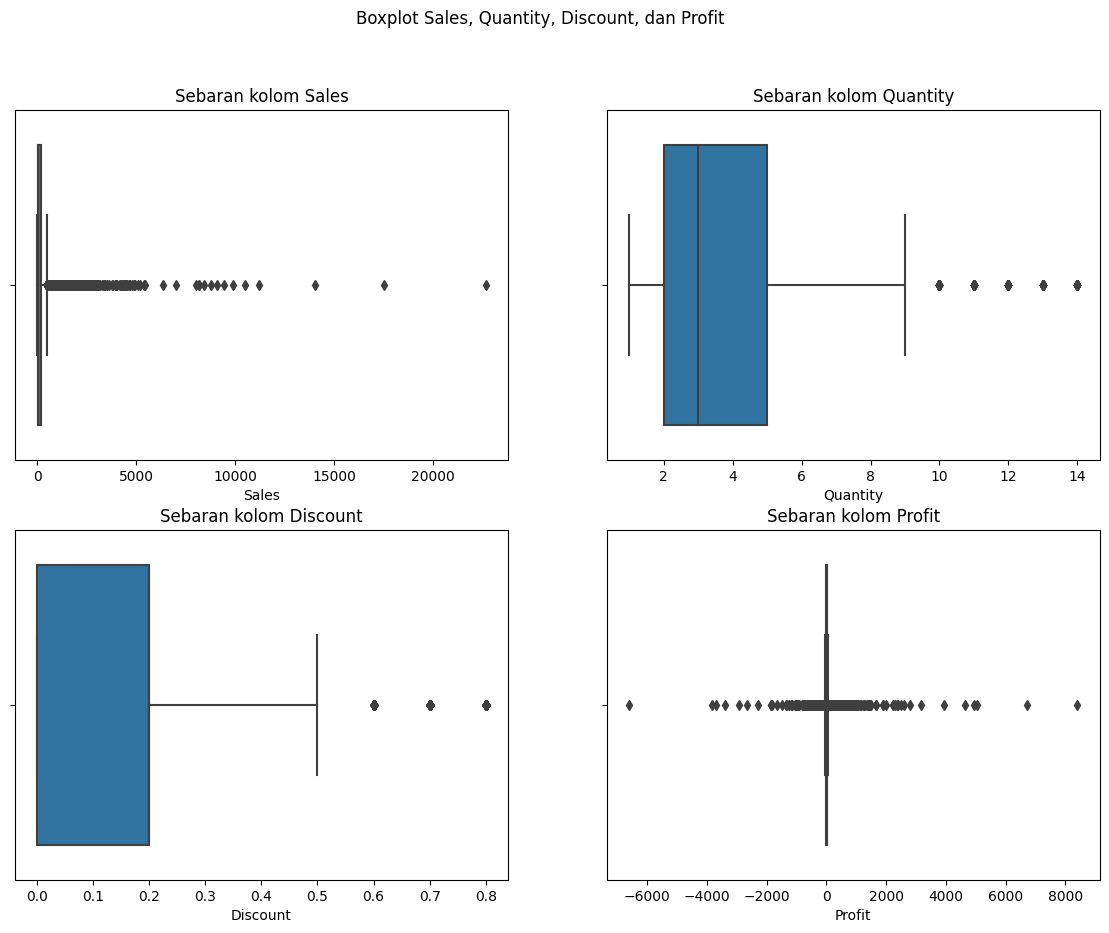

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(14,10))

fig.suptitle('Boxplot Sales, Quantity, Discount, dan Profit')

sb.boxplot(ax=axes[0, 0], data=DF, x='Sales').set(title='Sebaran kolom Sales')
sb.boxplot(ax=axes[0, 1], data=DF, x='Quantity').set(title='Sebaran kolom Quantity')
sb.boxplot(ax=axes[1, 0], data=DF, x='Discount').set(title='Sebaran kolom Discount')
sb.boxplot(ax=axes[1, 1], data=DF, x='Profit').set(title='Sebaran kolom Profit')

Dengan batas bawah Q1 - 1.5 IQR dan batas atas Q3 + 1.5 IQR, terlihat bahwa kolom `Sales`, `Quantity`, dan `Discount` memiliki *outlier* di atas batas atas, sedangkan kolom `Profit` memiliki banyak *outlier* di bawah batas bawah dan di atas batas atas. Untuk meninjau lebiih lanjut, kita hitung terlebih dahulu *interquartile range* serta batas data non-*outlier* dari masing-masing kolom.

In [ ]:
DFt=DF[['Sales','Quantity','Discount','Profit']]
Temp=[]
for x in DFt:
  Q1=DFt[x].quantile(0.25)
  Q3=DFt[x].quantile(0.75)
  IQR=Q3-Q1
  LB=Q1-1.5*IQR
  UB=Q3+1.5*IQR
  LOC=DFt[DFt[x]<LB][x].count()
  HOC=DFt[DFt[x]>UB][x].count()
  Temp.append([x,IQR,LB,UB,LOC,HOC,LOC/9994*100,HOC/9994*100])
Outlier=pd.DataFrame(Temp,columns=
 ['Kolom','IQR','Batas bawah','Batas atas','Outlier rendah','Outlier tinggi','Outlier rendah %','Outlier tinggi %'])
Outlier

,Kolom,IQR,Batas bawah,Batas atas,Outlier rendah,Outlier tinggi,Outlier rendah %,Outlier tinggi %
0,Sales,192.66000,-271.710000,498.930000,0,1167,0.000000,11.677006
1,Quantity,3.00000,-2.500000,9.500000,0,170,0.000000,1.701021
2,Discount,0.20000,-0.300000,0.500000,0,856,0.000000,8.565139
3,Profit,27.63525,-39.724125,70.816875,604,1277,6.043626,12.777667


Berdasarkan kriteria *interquartile range*, 1.7% data di kolom `Quantity` dan 8.57% data di kolom `Discount` termasuk *outlier*. Namun, angka tersebut masih terbilang cukup wajar (pembelian 14 produk dalam 1 transaksi dan diskon 80%), sehingga kedua kolom tersebut akan kita gunakan apa adanya. Dengan adanya data tersebut kita juga bisa melihat apakah transaksi dengan volume yang besar dan pemberian diskon yg tinggi berpengaruh terhadap keuntungan dari transaksi tersebut.

Untuk kolom `Sales` dan `Profit` persentase data yang termasuk *outlier* secara berturut-turut adalah 11.68% dan 18.82%, yang bisa dikatakan cukup signifikan. Dari diagram boxplot juga terlihat bahwa banyak dari data *outlier* yang bisa dibilang masih berkumpul tidak jauh dari *range* data non-*outlier*. Karena itu, kita akan mencoba menggunakan kriteria lain untuk menentukan *outlier*, yaitu data yang jaraknya terhadap mean lebih dari 3 standar deviasi.

In [ ]:
DFt=DF[['Sales','Profit']]
Temp=[]
for x in DFt:
  Mean=DFt[x].mean()
  STD=DFt[x].std()
  LB=Mean-3*STD
  UB=Mean+3*STD
  LOC=DFt[DFt[x]<LB][x].count()
  HOC=DFt[DFt[x]>UB][x].count()
  Temp.append([x,Mean,STD,LB,UB,LOC,HOC,LOC/9994*100,HOC/9994*100])
Outlier=pd.DataFrame(Temp,columns=
 ['Kolom','Mean','Std','Batas bawah','Batas atas','Outlier rendah','Outlier tinggi','Outlier rendah %','Outlier tinggi %'])
Outlier

,Kolom,Mean,Std,Batas bawah,Batas atas,Outlier rendah,Outlier tinggi,Outlier rendah %,Outlier tinggi %
0,Sales,229.858001,623.245101,-1639.877301,2099.593302,0,127,0.000000,1.270762
1,Profit,28.656896,234.260108,-674.123427,731.437219,37,70,0.370222,0.700420


Menggunakan kriteria ini, persentase data *outlier* pada kolom `Sales` dan `Profit` berturut-turut adalah 1.27% dan 1.07%, yang jauh lebih rendah dibanding ketika menggunakan kriteria sebelumnya. Untuk menangani *outlier* ini, kita akan mengubah nilainya menjadi nilai batas atas atau batas bawah.

In [4]:
DF.loc[DF['Sales']>2099.593,'Sales']=2099.593
DF.loc[DF['Profit']>731.437,'Profit']=731.437
DF.loc[DF['Profit']<-674.123,'Profit']=-674.123
DF.describe()

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,204.944604,3.789574,0.156203,25.540594
std,2885.163629,1.123898e+04,29.719388,370.864228,2.225110,0.206452,114.241822
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-674.123000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,2099.593000,14.000000,0.800000,731.437000


## Data Bersih

Setelah proses *data cleaning*, kita akan melihat kembali informasi umum dari dataset yang telah dirapihkan.

In [6]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Row ID        9994 non-null   int64         
 1   Order ID      9994 non-null   object        
 2   Order Date    9994 non-null   datetime64[ns]
 3   Date Key      9994 non-null   int64         
 4   Contact Name  9994 non-null   object        
 5   Country       9994 non-null   object        
 6   City          9994 non-null   object        
 7   Region        9994 non-null   object        
 8   Subregion     9994 non-null   object        
 9   Customer      9994 non-null   object        
 10  Customer ID   9994 non-null   int64         
 11  Industry      9994 non-null   object        
 12  Segment       9994 non-null   object        
 13  Product       9994 non-null   object        
 14  License       9994 non-null   object        
 15  Sales         9994 non-null   float64 

In [5]:
display(DF.describe(), DF.describe(include='object'))

,Row ID,Date Key,Customer ID,Sales,Quantity,Discount,Profit
count,9994.000000,9.994000e+03,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,2.021803e+07,1049.771963,204.944604,3.789574,0.156203,25.540594
std,2885.163629,1.123898e+04,29.719388,370.864228,2.225110,0.206452,114.241822
min,1.000000,2.020010e+07,1001.000000,0.444000,1.000000,0.000000,-674.123000
25%,2499.250000,2.021052e+07,1024.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,2.022063e+07,1049.000000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,2.023052e+07,1076.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,2.023123e+07,1101.000000,2099.593000,14.000000,0.800000,731.437000


,Order ID,Contact Name,Country,City,Region,Subregion,Customer,Industry,Segment,Product,License
count,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994,9994
unique,5009,793,48,262,3,12,99,10,3,14,9994
top,EMEA-2023-100111,Leonard Kelly,United States,London,EMEA,NAMER,Allianz,Finance,SMB,ContactMatcher,16GRM07R1K
freq,14,37,2001,922,4219,2507,192,2127,5191,1842,1


Jumlah baris tetap 9994, tipe data kolom  `Order Date` sudah menjadi datetime, serta nilai minimum dan maksimum dari kolom `Sales` dan `Profit` sudah sesuai dengan batas bawah dan batas atas data non-*outlier*. Rata-rata kolom `Profit` setelah dirapihkan menjadi 25.54. Kita juga akan simpan *dataframe* yang telah dirapihkan sebagai file csv baru untuk kebutuhan dashboard nanti.

In [129]:
DF.to_excel('SaaS-Sales-Clean.xlsx',index=False)

# Data Analysis

Setelah melakukan *data cleaning*, sekarang kita akan melakukan analisis untuk menentukan kriteria transaksi yang memberikan keuntungan yang besar, khususnya yang lebih dari rata-rata yaitu 25.54.

In [37]:
DF[DF['Profit']>25.54]

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.960,2,0.0,41.9136
1,2,EMEA-2022-152156,2022-11-09,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.940,3,0.0,219.5820
7,8,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,07842ES7DY,907.152,6,0.2,90.7152
9,10,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,OneView,71J8P9Z1P0,114.900,5,0.0,34.4700
10,11,AMER-2020-115812,2020-06-09,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,43NZ37VE2D,1706.184,9,0.2,85.3092
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9979,9980,AMER-2022-103674,2022-12-07,20221207,Lisa Peake,United States,New York City,AMER,NAMER,CVS Health,1026,Retail,Enterprise,ContactMatcher,8PH8DQWA5Q,437.472,14,0.2,153.1152
9983,9984,AMER-2022-157728,2022-09-23,20220923,Rebecca Dickens,Brazil,São Paulo,AMER,LATAM,Amazon,1004,Tech,SMB,Site Analytics,VMRUEJZVLR,97.980,2,0.0,27.4344
9987,9988,EMEA-2023-163629,2023-11-18,20231118,Dylan Dickens,Finland,Espoo,EMEA,NOR,Siemens,1043,Manufacturing,Strategic,Data Smasher,GGI2WZG0KP,79.990,1,0.0,28.7964
9988,9989,EMEA-2023-163629,2023-11-18,20231118,Dylan Dickens,Finland,Espoo,EMEA,NOR,Siemens,1043,Manufacturing,Strategic,Site Analytics,TFALA50KPS,206.100,5,0.0,55.6470


In [38]:
2728/9994

0.27296377826696017

Dari total 9994 transaksi, 2728 transaksi memiliki keuntungan yang lebih tinggi dari rata-rata keuntungan, atau sekitar 27.3%.

## Berdasarkan Waktu

Pertama kita akan melihat pengaruh waktu transaksi terhadap keuntungan. Kita akan membuat *dataframe* yang berisi kolom-kolom yang relevan dengan analisis pada bagian ini. Kita mengambil kolom `Row ID`, `Order Date`, dan `Profit`, serta membuat 2 kolom baru untuk menyimpan tahun dan bulan dilaksanakannya transaksi.

In [ ]:
DFDate=DF[['Row ID','Order Date','Profit']].copy()
DFDate.insert(2,'Year',DFDate['Order Date'].dt.year)
DFDate.insert(3,'Month',DFDate['Order Date'].dt.month)
DFDate

,Row ID,Order Date,Year,Month,Profit
0,1,2022-11-09,2022,11,41.9136
1,2,2022-11-09,2022,11,219.5820
2,3,2022-06-13,2022,6,6.8714
3,4,2021-10-11,2021,10,-383.0310
4,5,2021-10-11,2021,10,2.5164
...,...,...,...,...,...
9989,9990,2020-01-22,2020,1,4.1028
9990,9991,2023-02-27,2023,2,15.6332
9991,9992,2023-02-27,2023,2,19.3932
9992,9993,2023-02-27,2023,2,13.3200


Pada analisis ini, kita akan mencoba menjawab pertanyaan-pertanyaan ini:

*   Apakah ada tren peningkatan atau penurunan keuntungan setiap tahunnya?
*   Apakah ada tren peningkatan atau penurunan keuntungan setiap bulannya dalam masing-masing tahun?

[Text(0.5, 1.0, 'Total keuntungan tahunan')]

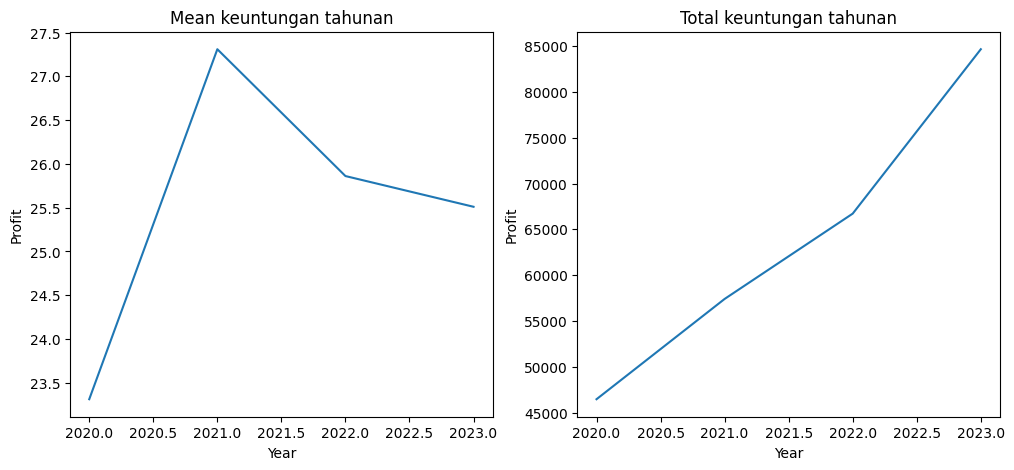

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sb.lineplot(ax=axes[0], data=DFDate,x='Year',y='Profit',estimator='mean',\
            errorbar=None).set(title='Mean keuntungan tahunan')
sb.lineplot(ax=axes[1], data=DFDate,x='Year',y='Profit',estimator='sum',\
            errorbar=None).set(title='Total keuntungan tahunan')

Pada grafik di kiri, terlihat bahwa rata-rata keuntungan pertahun mengalami kenaikan pada tahun 2021, kemudian penurunan pada tahun 2022 dan 2023.

sedangkan pada grafik di kanan, terlihat bahwa total keuntungan pertahun konsisten naik. Untuk mencari penjelasannya kita bisa melihat jumlah transaksi tiap tahunnya.

[Text(0.5, 1.0, 'Jumlah transaksi tahunan'), Text(0, 0.5, 'Jumlah transaksi')]

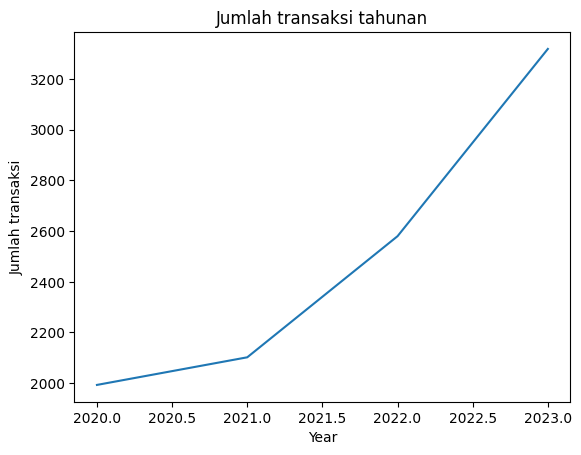

In [ ]:
sb.lineplot(data=DFDate,x='Year',y='Profit',estimator='count',\
            errorbar=None).set(title='Jumlah transaksi tahunan',ylabel='Jumlah transaksi')

Dari grafik ini terlihat bahwa jumlah transaksi meningkat setiap tahunnya. Dari 3 grafik ini, dapat disimpulkan bahwa total keuntungan tahunan konsisten naik karena jumlah transaksi tahunan yang konsisten naik, meskipun rata-rata keuntungan tahunan memuncak pada tahun 2021 dan turun pada 2022 dan 2023.

Selanjutnya kita akan melihat keuntungan bulanan tiap tahun.

<ipython-input-12-aa5bcbb9f2f9>:1: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sb.lineplot(data=DFDate,x='Month',y='Profit',hue='Year',estimator='mean',\


[Text(0.5, 1.0, 'Mean keuntungan bulanan')]

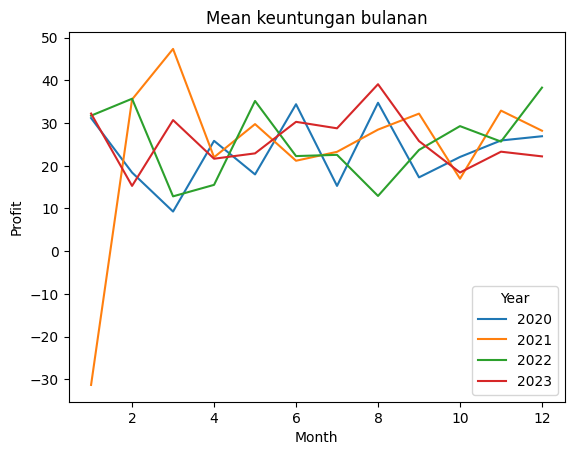

In [ ]:
sb.lineplot(data=DFDate,x='Month',y='Profit',hue='Year',estimator='mean',\
            errorbar=None,palette=sb.color_palette()).set(title='Mean keuntungan bulanan')

Dari grafik tidak terlihat adanya tren rata-rata keuntungan bulanan. Seperti yang kita lakukan sebelumnya, mari lihat total keuntungan dan jumlah transaksi bulanan.

<ipython-input-165-4bb8c0feff51>:3: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sb.lineplot(ax=axes[0],data=DFDate,x='Month',y='Profit',hue='Year',estimator='sum',\
<ipython-input-165-4bb8c0feff51>:5: UserWarning: The palette list has more values (10) than needed (4), which may not be intended.
  sb.lineplot(ax=axes[1],data=DFDate,x='Month',y='Profit',hue='Year',estimator='count',\


[Text(0.5, 1.0, 'Jumlah transaksi tiap bulan'),
 Text(0, 0.5, 'Jumlah transaksi')]

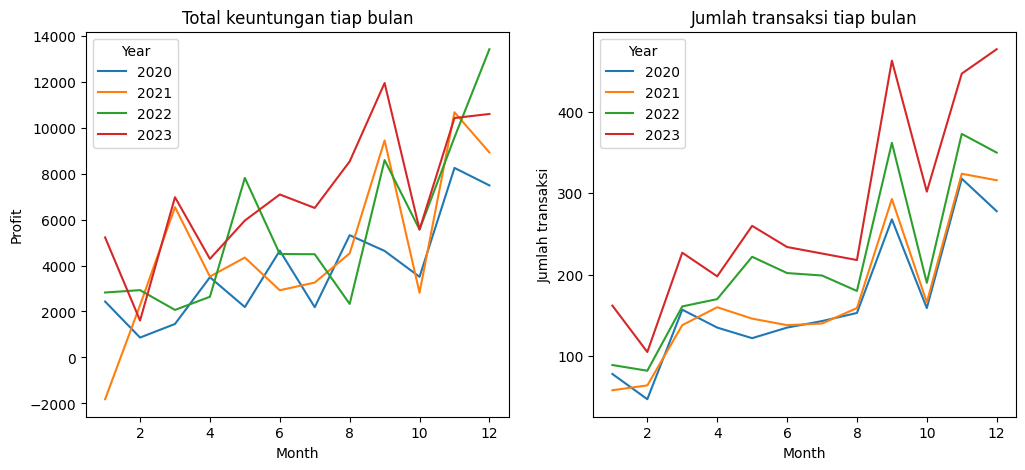

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sb.lineplot(ax=axes[0],data=DFDate,x='Month',y='Profit',hue='Year',estimator='sum',\
            errorbar=None,palette=sb.color_palette()).set(title='Total keuntungan bulanan')
sb.lineplot(ax=axes[1],data=DFDate,x='Month',y='Profit',hue='Year',estimator='count',\
            errorbar=None,palette=sb.color_palette()).set(title='Jumlah transaksi bulanan',ylabel='Jumlah transaksi')

Berdasarkan grafik,total keuntungan dan jumlah transaksi bulanan condong naik setiap tahunnya. Jumlah transaksi bulanan cenderung mencapai puncak pada bulan september dan november, tetapi mengalami penurunan pada bulan oktober. Perlu diperhatikan juga bahwa total keuntungan dan jumlah transaksi bulanan pada awal tahun lebih rendah dari total keuntungan dan jumlah transaksi bulanan pada akhir tahun sebelumnya.

Secara keseluruhan kita bisa menarik beberapa kesimpulan.

*   Rata-rata keuntungan tahunan mencapai nilai tertinggi di tahun 2021, kemudian turun di 2 tahun berikutnya.
*   Meskipun rata-rata keuntungan tahunan turun di 2 tahun terakhir, total keuntungan dan volume transaksi tahunan konsisten naik setiap tahunnya.
*   Dari 2 poin sebelumnya, perusahaan lebih berfokus kepada volume transaksi dibanding keuntungan masing-masing transaksi.
*   Tidak ada tren rata-rata keuntungan bulanan.
*   Total keuntungan dan volume transaksi bulanan cenderung lebih tinggi di akhir tahun, bahkan jika dibandingkan dengan tahun-tahun lainnya.
*   Pengecualian untuk poin sebelumnya adalah bulan oktober yang, walaupun lebih total keuntungan dan jumlah transaksinya lebih tinggi dibanding bulan-bulan di awal tahun, jauh lebih rendah dibanding bulan september dan november.


## Berdasarkan Lokasi

Selanjutnya kita akan melihat pengaruh lokasi transaksi terhadap keuntungan. Kita akan membuat *dataframe* yang berisi kolom-kolom yang relevan dengan analisis pada bagian ini. Kita mengambil kolom `Country`, `City`, `Region`, `Subregion`, dan `Profit`. Pada analisis ini, kita akan mencoba menjawab pertanyaan-pertanyaan ini:

*   Region mana yang memberikan keuntungan paling tinggi?
*   Subregion mana yang memberikan keuntungan paling tinggi?
*   Negara mana yang memberikan keuntungan paling tinggi?
*   Kota mana yang memberikan keuntungan paling tinggi?

Pertama, kita akan membuat *dataframe* dengan kolom `Region` serta kolom baru yang berisi jumlah transaksi, rata-rata keuntungan, dan total keuntungan dari masing-masing region.

In [8]:
DFReg=DF[['Region']].copy().drop_duplicates()
DFReg=pd.merge(DFReg,DF.groupby('Region').count()[['Profit']],on='Region')
DFReg.rename(columns={'Profit':'Sales Count'},inplace=True)
DFReg=pd.merge(DFReg,DF.groupby('Region').mean()[['Profit']],on='Region')
DFReg.rename(columns={'Profit':'Profit Mean'},inplace=True)
DFReg=pd.merge(DFReg,DF.groupby('Region').sum()[['Profit']],on='Region')
DFReg.rename(columns={'Profit':'Total Profit'},inplace=True)
DFReg.sort_values('Profit Mean',ascending=False).head(10)

<ipython-input-8-d63ab0870f5a>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFReg=pd.merge(DFReg,DF.groupby('Region').mean()[['Profit']],on='Region')
<ipython-input-8-d63ab0870f5a>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFReg=pd.merge(DFReg,DF.groupby('Region').sum()[['Profit']],on='Region')


,Region,Sales Count,Profit Mean,Total Profit
1,AMER,3665,31.998576,117274.7797
0,EMEA,4219,30.333726,127977.9916
2,APJ,2110,4.739300,9999.9235


Dari *dataframe* tersebut, terlihat bahwa region AMER memiliki rata-rata keuntungan tertinggi, region EMEA memiliki Jumlah penjualan dan total keuntungan tertinggi dengan rata-rata keuntungan tidak jauh di bawah region AMER, dan region APJ memiliki nilai yang paling rendah di ketiga pengukuran. Berdasarkan regionnya, bisa disimpulkan bahwa transaksi di region AMER dan EMEA cenderung memberikan keuntungan yang lebih tinggi, tetapi kesimpulan ini mungkin kurang efektif karena cakupannya terlalu luas.

Selanjutnya, kita akan membuat *dataframe* dengan kolom `Subregion`, jumlah negara dan kota di masing-masing subregion, serta kolom yang berisi jumlah transaksi, rata-rata keuntungan, dan total keuntungan dari masing-masing subregion.

In [14]:
DFSubreg=DF[['Region','Subregion']].copy().drop_duplicates()
DFSubreg=pd.merge(DFSubreg,DF.groupby('Subregion').nunique()[['Country']],on='Subregion')
DFSubreg=pd.merge(DFSubreg,DF.groupby('Subregion').nunique()[['City']],on='Subregion')
DFSubreg=pd.merge(DFSubreg,DF.groupby('Subregion').count()[['Profit']],on='Subregion')
DFSubreg.rename(columns={'Profit':'Sales Count'},inplace=True)
DFSubreg=pd.merge(DFSubreg,DF.groupby('Subregion').mean()[['Profit']],on='Subregion')
DFSubreg.rename(columns={'Profit':'Profit Mean'},inplace=True)
DFSubreg=pd.merge(DFSubreg,DF.groupby('Subregion').sum()[['Profit']],on='Subregion')
DFSubreg.rename(columns={'Profit':'Total Profit'},inplace=True)
DFSubreg.sort_values('Profit Mean',ascending=False)

<ipython-input-14-599eab716072>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFSubreg=pd.merge(DFSubreg,DF.groupby('Subregion').mean()[['Profit']],on='Subregion')
<ipython-input-14-599eab716072>:8: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFSubreg=pd.merge(DFSubreg,DF.groupby('Subregion').sum()[['Profit']],on='Subregion')


,Region,Subregion,Country,City,Sales Count,Profit Mean,Total Profit
5,EMEA,EU,1,12,110,76.380004,8401.8004
10,APJ,IND,1,6,149,71.490727,10652.1183
9,APJ,APAC,6,20,447,56.828287,25402.2441
0,EMEA,UKIR,2,17,1267,55.018745,69708.7502
1,AMER,NAMER,2,78,2507,39.889983,100004.1878
3,EMEA,NOR,3,10,489,31.781218,15541.0157
6,EMEA,MEA,6,13,396,21.778205,8624.1693
11,EMEA,EU-EAST,5,16,343,17.650933,6054.2700
7,AMER,LATAM,6,25,1158,14.914155,17270.5919
2,EMEA,EU-WEST,13,40,1614,12.173473,19647.9860


<ipython-input-13-34b050b0c3fb>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


[Text(0.5, 1.0, 'Rata-rata keuntungan berdasarkan subregion')]

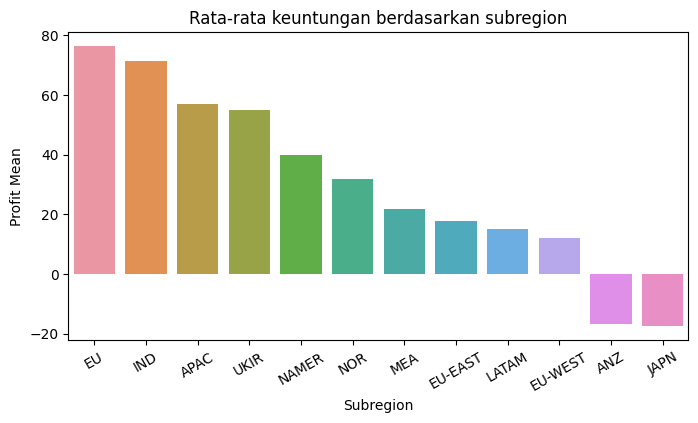

In [13]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
sb.barplot(DFSubreg.sort_values('Profit Mean',ascending=False),x='Subregion',y='Profit Mean')\
.set(title='Rata-rata keuntungan berdasarkan subregion')

Subregion dengan rata-rata keuntungan tertinggi adalah EU, diikuti oleh IND, APAC, UKIR, Namer, dan NOR, semuanya di atas rata-rata keuntungan keseluruhan. Di sisi lain, terdapat 2 subregion dengan rata-rata keuntungan negatif, yaitu ANZ dan JAPN. Selanjutnya kita akan melihat jumlah penjualan dan total keuntungan tiap subregion.

<ipython-input-20-5e5284dd993c>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


[Text(0.5, 1.0, 'Banyak transaksi berdasarkan subregion')]

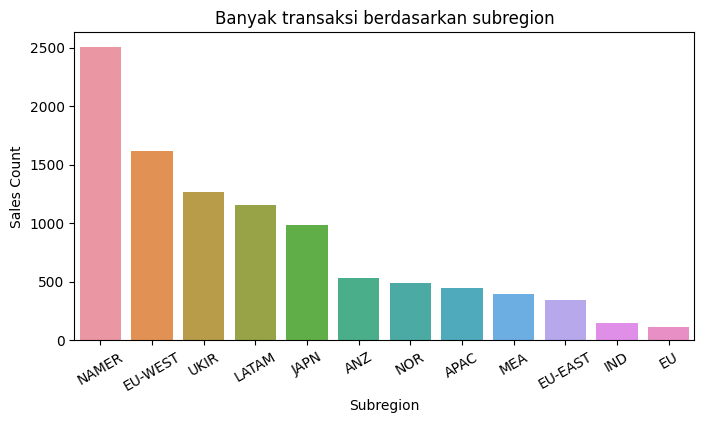

In [20]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
sb.barplot(DFSubreg.sort_values('Sales Count',ascending=False),x='Subregion',y='Sales Count')\
.set(title='Banyak transaksi berdasarkan subregion')

tiga subregion dengan jumlah penjualan tertinggi secara berturut-turut adalah NAMER, EU-WEST, dan UKIR, sementara EU berada di posisi terakhir.

<ipython-input-21-92a3d96957a2>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


[Text(0.5, 1.0, 'Total keuntungan berdasarkan subregion')]

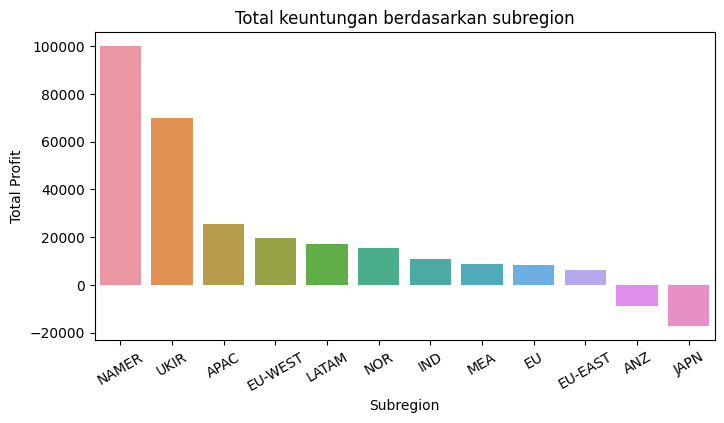

In [21]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
sb.barplot(DFSubreg.sort_values('Total Profit',ascending=False),x='Subregion',y='Total Profit')\
.set(title='Total keuntungan berdasarkan subregion')

Subregion dengan total keuntungan tertinggi adalah NAMER, diikuti oleh UKIR, keduanya memiliki rata-rata keuntungan di atas rata-rata keuntungan keseluruhan.

Selanjutnya kita akan melakukan analisis yang sama terhadap kolom `Country`.

In [25]:
DFCount=DF[['Region','Subregion','Country']].copy().drop_duplicates()
DFCount=pd.merge(DFCount,DF.groupby('Country').nunique()[['City']],on='Country')
DFCount=pd.merge(DFCount,DF.groupby('Country').count()[['Profit']],on='Country')
DFCount.rename(columns={'Profit':'Sales Count'},inplace=True)
DFCount=pd.merge(DFCount,DF.groupby('Country').mean()[['Profit']],on='Country')
DFCount.rename(columns={'Profit':'Profit Mean'},inplace=True)
DFCount=pd.merge(DFCount,DF.groupby('Country').sum()[['Profit']],on='Country')
DFCount.rename(columns={'Profit':'Total Profit'},inplace=True)
DFCount.sort_values('Profit Mean',ascending=False).head(10)

<ipython-input-25-2a7f1e5cafd2>:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFCount=pd.merge(DFCount,DF.groupby('Country').mean()[['Profit']],on='Country')
<ipython-input-25-2a7f1e5cafd2>:7: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFCount=pd.merge(DFCount,DF.groupby('Country').sum()[['Profit']],on='Country')


,Region,Subregion,Country,City,Sales Count,Profit Mean,Total Profit
41,EMEA,MEA,Egypt,1,11,178.480755,1963.2883
39,EMEA,EU-WEST,Austria,1,10,105.958930,1059.5893
46,EMEA,EU-WEST,Slovenia,1,1,100.196000,100.1960
34,EMEA,NOR,Norway,2,56,93.667312,5245.3695
19,EMEA,EU-WEST,Portugal,2,61,82.935448,5059.0623
6,EMEA,EU,Italy,12,110,76.380004,8401.8004
11,EMEA,EU-WEST,Luxembourg,1,89,76.106745,6773.5003
0,EMEA,UKIR,Ireland,3,126,75.578160,9522.8481
26,APJ,APAC,Singapore,1,66,73.544788,4853.9560
25,EMEA,EU-WEST,Poland,2,66,73.005805,4818.3831


In [50]:
print('Negara dengan rata-rata keuntungan positif: ',DFCount[DFCount['Profit Mean']>0].shape[0])
print('Negara dengan rata-rata keuntungan di atas 25.54: ',DFCount[DFCount['Profit Mean']>25.54].shape[0])
DFCount[DFCount['Profit Mean']>25.54].groupby('Subregion').count()[['Country']]

Negara dengan rata-rata keuntungan positif:  38
Negara dengan rata-rata keuntungan di atas 25.54:  38


,Country
Subregion,
ANZ,1
APAC,6
EU,1
EU-EAST,4
EU-WEST,10
IND,1
LATAM,4
MEA,5
NAMER,2


Dari 48 negara, 38 memiliki rata-rata keuntungan positif, semuanya di atas rata-rata keuntungan keseluruhan. Dari negara-negara dengan rata-rata keuntungan positif, 10 negara berada di subregion EU-WEST. Subregion dengan negara berrata-rata keuntungan positif terbanyak kedua adalah APAC. Kita akan melihat 10 negara dengan rata-rata keuntungan tertinggi.

<ipython-input-27-896e0096c63d>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


[Text(0.5, 1.0, 'Rata-rata keuntungan berdasarkan negara')]

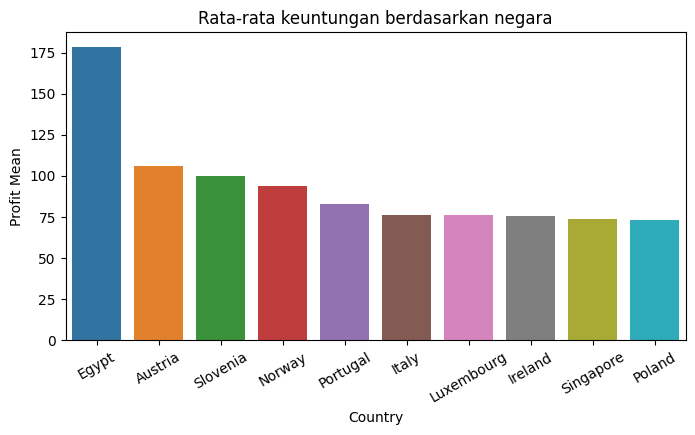

In [27]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
sb.barplot(DFCount.sort_values('Profit Mean',ascending=False).head(10),x='Country',y='Profit Mean')\
.set(title='Rata-rata keuntungan berdasarkan negara')

Negara dengan rata-rata keuntungan tertinggi adalah Mesir. Selanjutnya mari kita coba urutkan negara-negara yang rata-rata keuntungannya di atas 25.54 berdasarkan total keuntungannya.

<ipython-input-49-5da8dad9bb77>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


[Text(0.5, 1.0, 'Total keuntungan berdasarkan negara')]

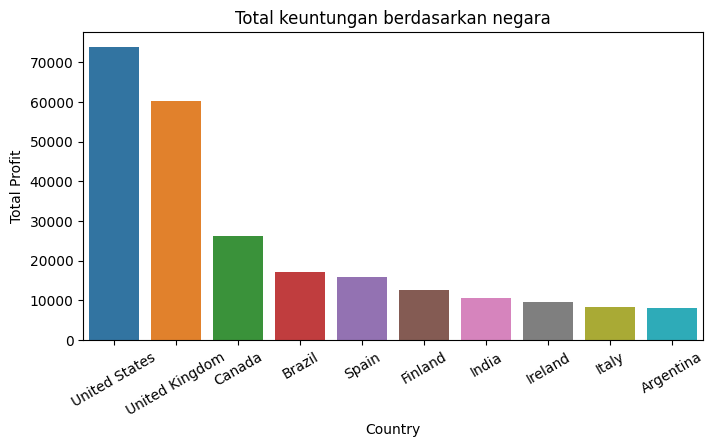

In [49]:
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
sb.barplot(DFCount[DFCount['Profit Mean']>25.54].sort_values('Total Profit',ascending=False).head(10),x='Country',y='Total Profit')\
.set(title='Total keuntungan berdasarkan negara')

In [51]:
DFCount[DFCount['Country'].isin(['United States','United Kingdom','Canada','Brazil','Spain'])]

,Region,Subregion,Country,City,Sales Count,Profit Mean,Total Profit
1,AMER,NAMER,United States,68,2001,36.943016,73922.9759
4,AMER,NAMER,Canada,10,506,51.543897,26081.2119
12,AMER,LATAM,Brazil,6,255,67.460720,17202.4836
15,EMEA,UKIR,United Kingdom,14,1141,52.748380,60185.9021
17,EMEA,EU-WEST,Spain,8,224,70.470014,15785.2831


Di antara negara-negara dengan rata-rata keuntungan positif, yang memiliki total keuntungan paling tinggi adalah amerika serikat, inggris, kanada, brazil, dan spanyol.

Terakhir kita akan mencari kota dengan keuntungan tertinggi. Karena cakupannya akan menjadi terlalu luas jika kita mempertimbangkan semua kota, kita hanya akan melihat kota dengan rata-rata keuntungan lebih dari 25.54 yang berada di 5 negara dengan total keuntungan tertinggi.

In [64]:
DFCity=DF[DF['Country'].isin(['United States','United Kingdom','Canada','Brazil','Spain'])][['Region','Subregion','Country','City']].copy().drop_duplicates()
DFCity=pd.merge(DFCity,DF.groupby('City').count()[['Profit']],on='City')
DFCity.rename(columns={'Profit':'Sales Count'},inplace=True)
DFCity=pd.merge(DFCity,DF.groupby('City').mean()[['Profit']],on='City')
DFCity.rename(columns={'Profit':'Profit Mean'},inplace=True)
DFCity=pd.merge(DFCity,DF.groupby('City').sum()[['Profit']],on='City')
DFCity.rename(columns={'Profit':'Total Profit'},inplace=True)
DFCity=DFCity[DFCity['Profit Mean']>25.54]
DFCity.sort_values('Profit Mean',ascending=False)

<ipython-input-64-750fee1f514f>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFCity=pd.merge(DFCity,DF.groupby('City').mean()[['Profit']],on='City')
<ipython-input-64-750fee1f514f>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFCity=pd.merge(DFCity,DF.groupby('City').sum()[['Profit']],on='City')


,Region,Subregion,Country,City,Sales Count,Profit Mean,Total Profit
77,EMEA,UKIR,United Kingdom,Glasgow,2,394.514900,789.0298
99,AMER,NAMER,United States,Minneapolis,3,254.844600,764.5338
22,AMER,NAMER,United States,Henderson,6,128.581700,771.4902
54,EMEA,EU-WEST,Spain,Zaragoza,7,127.074843,889.5239
78,AMER,NAMER,United States,Wilmington,1,110.052800,110.0528
...,...,...,...,...,...,...,...
85,AMER,NAMER,Canada,Regina,4,28.777350,115.1094
12,AMER,NAMER,United States,Providence,16,28.384725,454.1556
70,AMER,NAMER,United States,Burlington,14,27.392057,383.4888
19,AMER,NAMER,United States,Jacksonville,28,27.302157,764.4604


Ada 65 kota yang memenuhi syarat. Kita akan melihat 10 kota dengan total keuntungan tertinggi.

,Region,Subregion,Country,City,Sales Count,Profit Mean,Total Profit
4,EMEA,UKIR,United Kingdom,London,922,53.776244,49581.6972
0,AMER,NAMER,United States,New York City,740,39.658411,29347.2239
1,AMER,NAMER,Canada,Toronto,431,50.708559,21855.3891
2,AMER,NAMER,United States,Los Angeles,510,33.909482,17293.8359
14,AMER,LATAM,Brazil,São Paulo,133,73.115550,9724.3681
16,AMER,NAMER,United States,Seattle,170,37.512918,6377.1960
65,EMEA,EU-WEST,Spain,Barcelona,44,90.030625,3961.3475
7,AMER,LATAM,Brazil,Rio de Janeiro,50,77.450936,3872.5468
6,EMEA,EU-WEST,Spain,Madrid,55,56.278540,3095.3197
66,EMEA,EU-WEST,Spain,Valencia,35,86.391617,3023.7066


<ipython-input-69-48708e33cb27>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


[Text(0.5, 1.0, 'Total keuntungan berdasarkan Kota')]

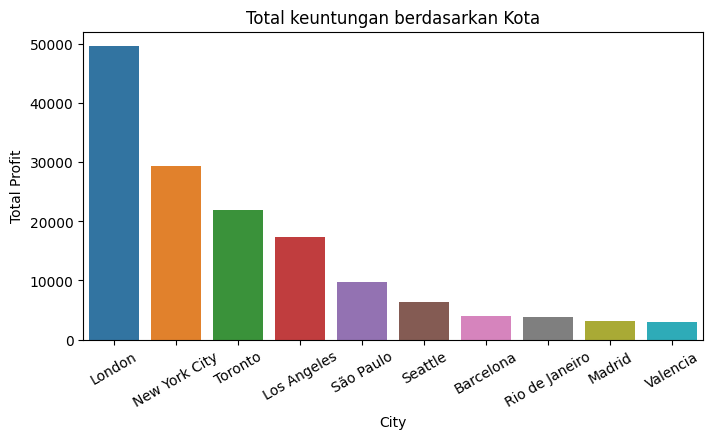

In [69]:
display(DFCity.sort_values('Total Profit',ascending=False).head(10))
fig, ax = plt.subplots(figsize=(8, 4))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
sb.barplot(DFCity.sort_values('Total Profit',ascending=False).head(10),x='City',y='Total Profit')\
.set(title='Total keuntungan berdasarkan Kota')

Pada bagian ini, Secara keseluruhan kita bisa menarik kesimpulan sebagai berikut:

*   Transaksi di region AMER dan EMEA memberikan keuntungan yang lebih tinggi.
*   Subregion dengan total keuntungan tertinggi adalah NAMER dan UKIR.
*   Subregion EU memiliki rata-rata keuntungan yang tinggi tetapi jumlah transaksinya terlalu kecil.
*   Negara yang memberikan total keuntungan tertinggi adalah amerika serikat, inggris, kanada, brazil, dan spanyol.
*   Mesir memiliki rata-rata keuntungan yang tinggi, tetapi jumlah transaksinya tidak signifikan.
*   Di antara kota yang berada di 5 negara dengan total keuntungan tertinggi, kota yang memberikan keuntungan terbesar adalah London, New York, Toronto, Los Angeles, Sao Paulo, dan Seattle.



## Berdasarkan Pembeli

Selanjutnya kita akan melihat pengaruh lokasi transaksi terhadap keuntungan. Pada analisis ini, kita akan mencoba menjawab pertanyaan-pertanyaan ini:

*   Transaksi dengan perusahaan apa yang memberikan keuntungan paling tinggi?
*   Transaksi dengan perusahaan di industri apa yang memberikan keuntungan paling tinggi?
*   Transaksi dengan perusahaan di segmen apa yang memberikan keuntungan paling tinggi?

Untuk menjawab dua pertanyaan pertama, kita akan membuat *dataframe* dengan kolom `Industry` dan `Customer`, serta kolom baru yang berisi jumlah transaksi, rata-rata keuntungan, dan total keuntungan dari masing-masing perusahaan pelanggan.

In [16]:
DFCust=DF[['Industry','Customer']].copy().drop_duplicates()
DFCust=pd.merge(DFCust,DF.groupby('Customer').count()[['Profit']],on='Customer')
DFCust.rename(columns={'Profit':'Sales Count'},inplace=True)
DFCust=pd.merge(DFCust,DF.groupby('Customer').mean()[['Profit']],on='Customer')
DFCust.rename(columns={'Profit':'Profit Mean'},inplace=True)
DFCust=pd.merge(DFCust,DF.groupby('Customer').sum()[['Profit']],on='Customer')
DFCust.rename(columns={'Profit':'Total Profit'},inplace=True)
print('Perusahaan pelanggan dengan rata-rata keuntungan positif: ',DFCust[DFCust['Profit Mean']>0].shape[0])
print('Perusahaan pelanggan dengan rata-rata keuntungan di ats 25.54: ',DFCust[DFCust['Profit Mean']>25.54].shape[0])
DFCust.sort_values('Profit Mean',ascending=False).head(10)

Perusahaan pelanggan dengan rata-rata keuntungan positif:  97
Perusahaan pelanggan dengan rata-rata keuntungan di ats 25.54:  49


<ipython-input-16-64fb321075e7>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFCust=pd.merge(DFCust,DF.groupby('Customer').mean()[['Profit']],on='Customer')
<ipython-input-16-64fb321075e7>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFCust=pd.merge(DFCust,DF.groupby('Customer').sum()[['Profit']],on='Customer')


,Industry,Customer,Sales Count,Profit Mean,Total Profit
37,Energy,Valero Energy,105,57.442073,6031.4177
40,Finance,Trafigura Group,103,55.138577,5679.2734
8,Retail,Home Depot,95,53.932582,5123.5953
94,Misc,News Corp.,51,52.111996,2657.7118
1,Energy,Phillips 66,86,51.974634,4469.8185
92,Tech,Alphabet,44,50.171843,2207.5611
66,Transportation,United Parcel Service,88,49.305286,4338.8652
22,Finance,Bank of America Corp.,132,47.261187,6238.4767
15,Misc,Glencore,56,46.600605,2609.6339
57,Retail,Kroger,135,46.341485,6256.1005


Dari 99 perusahaan, 97 memiliki transaksi dengan rata-rata keuntungan positif, 49 di antaranya memiliki rata-rata keuntungan lebih dari rata-rata keseluruhan. Selanjutnya kita akan melihat perusahaan yang memberi total keuntungan tertinggi di antara 49 perusahaan tersebut.

<ipython-input-17-6d5438fe3a83>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


[Text(0.5, 1.0, 'Total keuntungan dari perusahaan dengan rata-rata keuntungan di atas 25.54')]

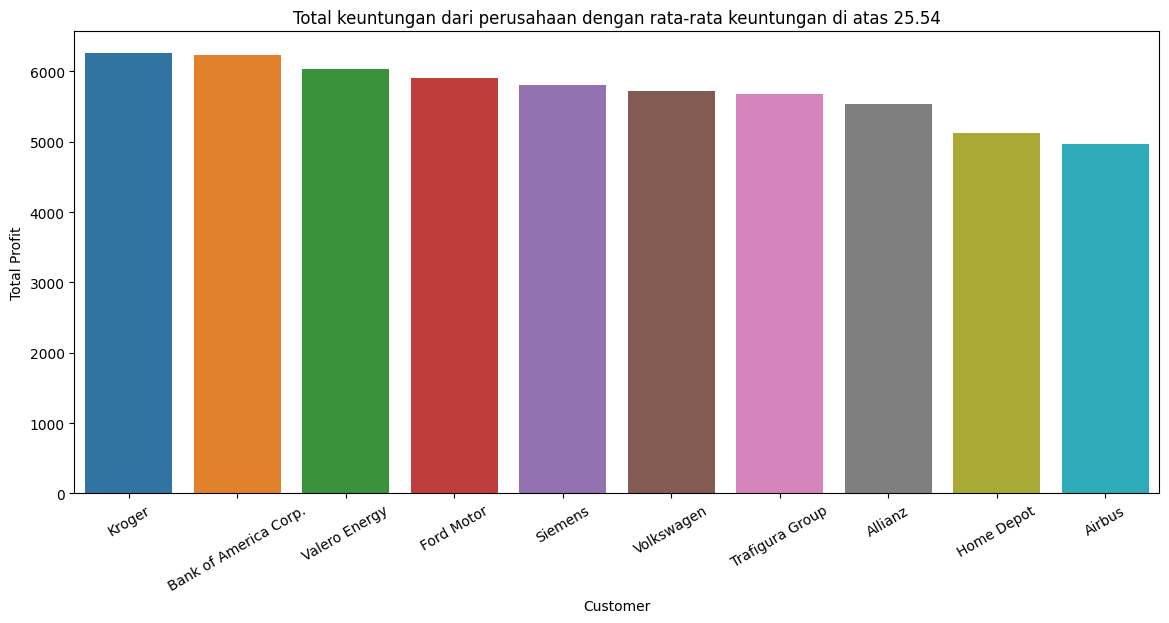

In [17]:
DFCust=DFCust[DFCust['Profit Mean']>25.54]
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
sb.barplot(data=DFCust.sort_values('Total Profit',ascending=False).head(10),x='Customer',y='Total Profit')\
.set(title='Total keuntungan dari perusahaan dengan rata-rata keuntungan di atas 25.54')

In [9]:
DFCust[DFCust['Customer'].isin(['Kroger','Bank of America Corp.','Valero Energy','Ford Motor','Siemens'])]

,Industry,Customer,Sales Count,Profit Mean,Total Profit
13,Manufacturing,Siemens,170,34.184779,5811.4125
22,Finance,Bank of America Corp.,132,47.261187,6238.4767
37,Energy,Valero Energy,105,57.442073,6031.4177
57,Retail,Kroger,135,46.341485,6256.1005
72,Manufacturing,Ford Motor,176,33.579649,5910.0183


Dari 47 perusahaan yang rata-rata keuntungannya di atas 25.54, perusahaan yang memberi total keuntungan tertinggi adalah Kroger, Bank of America Corp., Valero Energy, Ford Motor, dan Siemens.

In [18]:
DFInd=DF[['Industry']].copy().drop_duplicates()
DFInd=pd.merge(DFInd,DF.groupby('Industry').nunique()[['Customer']],on='Industry')
DFInd.rename(columns={'Customer':'Cust'},inplace=True)
DFInd=pd.merge(DFInd,DFCust.groupby('Industry').count()[['Customer']],on='Industry')
DFInd.rename(columns={'Customer':'High Profit Cust'},inplace=True)
DFInd['High Profit Cust %']=DFInd['High Profit Cust']/DFInd['Cust']*100
DFIndT=DFInd
DFIndT.sort_values('High Profit Cust %',ascending=False)

,Industry,Cust,High Profit Cust,High Profit Cust %
7,Misc,2,2,100.000000
8,Transportation,4,3,75.000000
4,Manufacturing,11,7,63.636364
0,Energy,14,7,50.000000
3,Healthcare,10,5,50.000000
2,Tech,13,6,46.153846
5,Retail,11,5,45.454545
6,Consumer Products,9,4,44.444444
1,Finance,20,8,40.000000
9,Communications,5,2,40.000000


Dari 47 perusahaan tersebut, mayoritas bergerak di industri finance, diikuti oleh industri energy dan manufacturing, kemudian technology. Namun jika dilihat dari proporsinya, industri dengan proporsi perusahaan yang memenuhi kriteria tertinggi adalah misc, dengan 100% perusahaannya memberikan rata-rata keuntungan di atas 25.54, diikuti oleh transportation dengan 75%, Manufacturing dengan 63.6%, kemudian energy dan healthcare dengan 50%.

Selanjutnya kita akan melihat jumlah penjualan, rata-rata keuntungan, dan total keuntungan dari masing-masing industri secara keseluruhan.

In [20]:
DFInd=DFIndT
DFInd=pd.merge(DFInd,DF.groupby('Industry').count()[['Profit']],on='Industry')
DFInd.rename(columns={'Profit':'Sales Count'},inplace=True)
DFInd=pd.merge(DFInd,DF.groupby('Industry').mean()[['Profit']],on='Industry')
DFInd.rename(columns={'Profit':'Profit Mean'},inplace=True)
DFInd=pd.merge(DFInd,DF.groupby('Industry').sum()[['Profit']],on='Industry')
DFInd.rename(columns={'Profit':'Total Profit'},inplace=True)
DFInd.sort_values('Profit Mean',ascending=False).head(10)

<ipython-input-20-000d5744f76f>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFInd=pd.merge(DFInd,DF.groupby('Industry').mean()[['Profit']],on='Industry')
<ipython-input-20-000d5744f76f>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFInd=pd.merge(DFInd,DF.groupby('Industry').sum()[['Profit']],on='Industry')


,Industry,Cust,High Profit Cust,High Profit Cust %,Sales Count,Profit Mean,Total Profit
7,Misc,2,2,100.000000,107,49.227530,5267.3457
4,Manufacturing,11,7,63.636364,1222,30.188628,36890.5035
5,Retail,11,5,45.454545,972,29.330497,28509.2434
0,Energy,14,7,50.000000,1316,27.195073,35788.7159
8,Transportation,4,3,75.000000,351,26.614632,9341.7357
3,Healthcare,10,5,50.000000,1049,25.632584,26888.5807
1,Finance,20,8,40.000000,2127,24.691042,52517.8463
6,Consumer Products,9,4,44.444444,1021,21.832195,22290.6708
2,Tech,13,6,46.153846,1236,20.834326,25751.2274
9,Communications,5,2,40.000000,593,20.247598,12006.8254


Enam industri memiliki rata-rata keuntungan lebih dari rata-rata keuntungan keseluruhan.

<ipython-input-21-59e9980802bb>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


[Text(0.5, 1.0, 'Total keuntungan dari industri dengan rata-rata keuntungan di atas 25.54')]

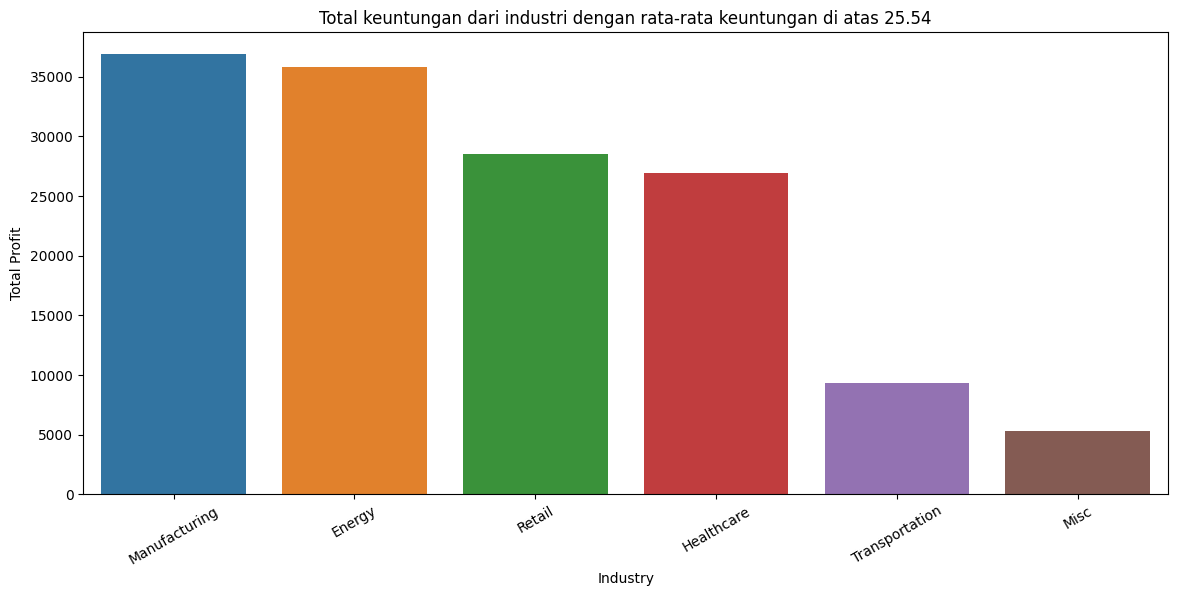

In [21]:
DFInd=DFInd[DFInd['Profit Mean']>25.54]
fig, ax = plt.subplots(figsize=(14, 6))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
sb.barplot(data=DFInd.sort_values('Total Profit',ascending=False).head(10),x='Industry',y='Total Profit')\
.set(title='Total keuntungan dari industri dengan rata-rata keuntungan di atas 25.54')

In [43]:
DFInd.sort_values('High Profit Cust %',ascending=False).head(10)

,Industry,Cust,High Profit Cust,High Profit Cust %,Sales Count,Profit Mean,Total Profit
7,Misc,2,2,100.000000,107,49.227530,5267.3457
8,Transportation,4,3,75.000000,351,26.614632,9341.7357
4,Manufacturing,11,7,63.636364,1222,30.188628,36890.5035
0,Energy,14,7,50.000000,1316,27.195073,35788.7159
3,Healthcare,10,5,50.000000,1049,25.632584,26888.5807
5,Retail,11,5,45.454545,972,29.330497,28509.2434


Dari keenam industri tersebut, yang memberikan total keuntungan tertinggi adalah manufacturing, diikuti oleh energy, retail, dan healthcare. dari 4 industri tersebut, manufacturing memiliki persentase perusahaan dengan rata-rata keuntungan lebih dari 25.54 yang tertinggi, yaitu 63.63% diikuti oleh energy dan healthcare pada 50%.

Selanjutnya kita akan melihat jumlah penjualan, rata-rata keuntungan, dan total keuntungan dari masing-masing segmen.

In [23]:
DFSeg=DF[['Segment']].copy().drop_duplicates()
DFSeg=pd.merge(DFSeg,DF.groupby('Segment').count()[['Profit']],on='Segment')
DFSeg.rename(columns={'Profit':'Sales Count'},inplace=True)
DFSeg=pd.merge(DFSeg,DF.groupby('Segment').mean()[['Profit']],on='Segment')
DFSeg.rename(columns={'Profit':'Profit Mean'},inplace=True)
DFSeg=pd.merge(DFSeg,DF.groupby('Segment').sum()[['Profit']],on='Segment')
DFSeg.rename(columns={'Profit':'Total Profit'},inplace=True)
DFSeg

<ipython-input-23-8307b242f86f>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFSeg=pd.merge(DFSeg,DF.groupby('Segment').mean()[['Profit']],on='Segment')
<ipython-input-23-8307b242f86f>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFSeg=pd.merge(DFSeg,DF.groupby('Segment').sum()[['Profit']],on='Segment')


,Segment,Sales Count,Profit Mean,Total Profit
0,SMB,5191,23.242323,120650.8993
1,Strategic,3020,26.617361,80384.4311
2,Enterprise,1783,30.407944,54217.3644


Berdasarkan tabel, segmen SMB memberikan total keuntungan tertinggi, tetapirata-rata keuntungannya di bawah rata-rata keuntungan keseluruhan. Segmen dengan rata-rata keuntungan tertinggi adalah enterprise.

Pada bagian ini, Secara keseluruhan kita bisa menarik kesimpulan sebagai berikut:

*   Perusahaan yang memberikan total keuntungan tertinggi, dengan rata-rata keuntungan lebih dari rata-rata keuntungan keseluruhan, adalah Kroger, Bank of America Corp., Valero Energy, Ford Motor, dan Siemens.
*   Industri yang memberikan total keuntungan tertinggi, dengan rata-rata keuntungan lebih dari 25.54 dan persentase perusahaan dengan kriteria yang sama setidaknya 50%, adalah manufacturing, retail, dan healthcare.
*   Segmen dengan total keuntungan tertinggi adalah SMB, tapi rata-rata keuntungannya kurang dari 25.54. Segmen dengan rata-rata keuntungan tertinggi adalah enterprise, tapi total keuntungannya paling rendah dari 3 segmen yang ada.

## Berdasarkan Penjualan

Selanjutnya kita akan melihat pengaruh lokasi transaksi terhadap keuntungan. Pada analisis ini, kita akan mencoba menjawab pertanyaan-pertanyaan ini:

*   Penjualan produk apa yang memberikan keuntungan paling tinggi?
*   Apakah jumlah produk dalam satu transaksi mempengaruhi keuntungan dari transaksi tersebut?
*   Apakah besar diskon pada suatu transaksi mempengaruhi keuntungan dari transaksi tersebut?

Untuk pertanyaan pertama, kita akan membuat *dataframe* yang berisi jumlah penjualan, rata-rata keuntungan, dan total keuntungan dari masing-masing produk.

In [29]:
DFProd=DF[['Product']].copy().drop_duplicates()
DFProd=pd.merge(DFProd,DF.groupby('Product').count()[['Profit']],on='Product')
DFProd.rename(columns={'Profit':'Sales Count'},inplace=True)
DFProd=pd.merge(DFProd,DF.groupby('Product').mean()[['Profit']],on='Product')
DFProd.rename(columns={'Profit':'Profit Mean'},inplace=True)
DFProd=pd.merge(DFProd,DF.groupby('Product').sum()[['Profit']],on='Product')
DFProd.rename(columns={'Profit':'Total Profit'},inplace=True)
DFProd.sort_values('Profit Mean',ascending=False)

<ipython-input-29-912672aaedf4>:4: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFProd=pd.merge(DFProd,DF.groupby('Product').mean()[['Profit']],on='Product')
<ipython-input-29-912672aaedf4>:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  DFProd=pd.merge(DFProd,DF.groupby('Product').sum()[['Profit']],on='Product')


,Product,Sales Count,Profit Mean,Total Profit
13,Alchemy,68,393.970840,26790.0171
9,Data Smasher,775,53.916851,41785.5598
12,Big Ol Database,115,51.847681,5962.4833
6,Site Analytics,889,49.263159,43794.9483
7,OneView,466,40.023294,18650.8551
1,FinanceHub,981,32.703909,32082.5345
10,SaaS Connector Pack - Gold,254,27.418019,6964.1767
3,Marketing Suite - Gold,846,25.080372,21217.9943
8,Support,1560,21.379217,33351.5788
4,SaaS Connector Pack,957,13.645918,13059.1436


<ipython-input-30-a94c79f4017f>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


[Text(0.5, 1.0, 'Rata-rata keuntungan dari penjualan masing-masing produk')]

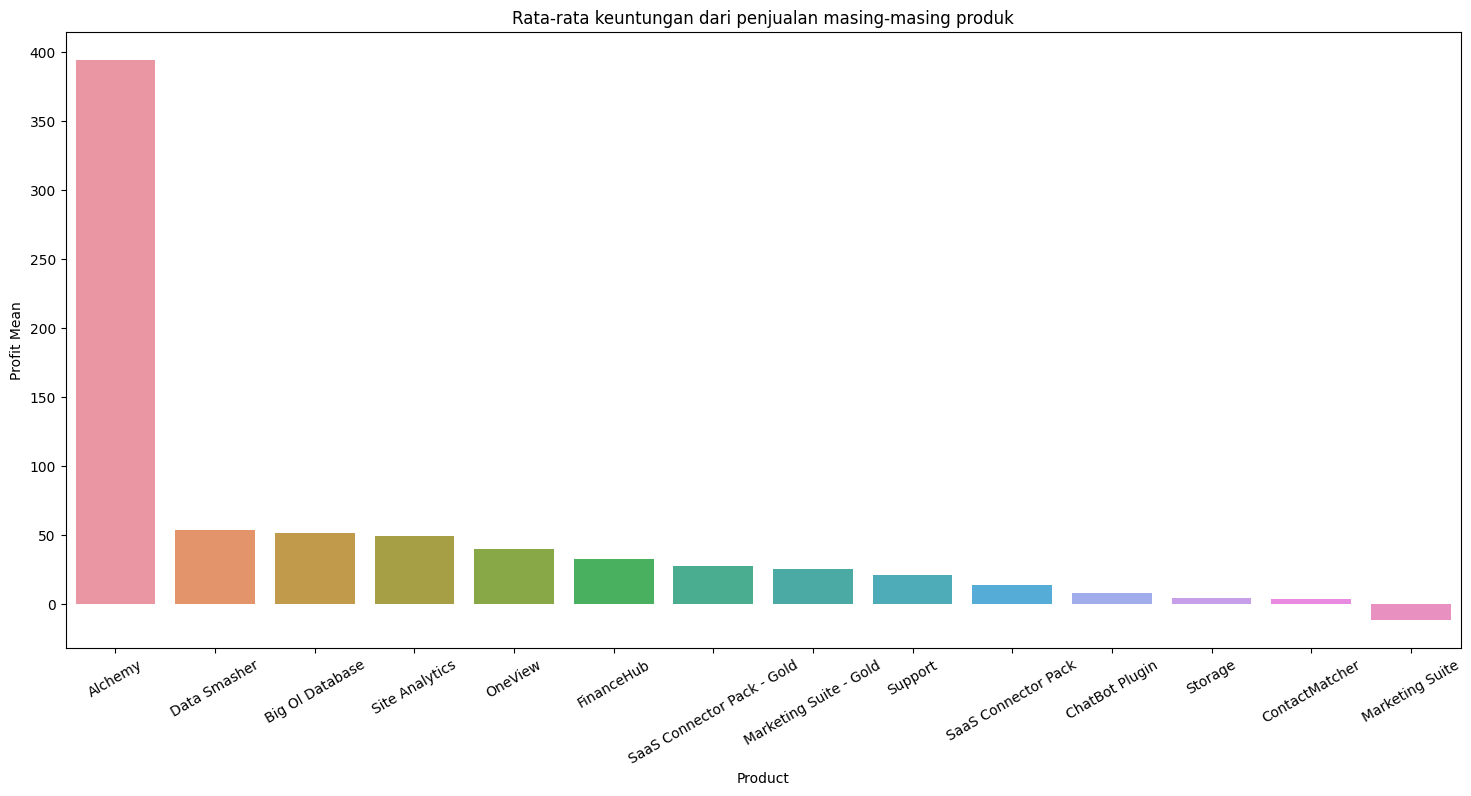

In [30]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
sb.barplot(data=DFProd,x='Product',y='Profit Mean',order=DFProd.sort_values('Profit Mean',ascending=False)['Product'])\
.set(title='Rata-rata keuntungan dari penjualan masing-masing produk')

Dari tabel dan grafik terlihat 7 produk memberikan rata-rata keuntungan lebih dari rata-rata keuntungan keseluruhan, yaitu 25.54. Produk-produk tersebut adalah:

*   Alchemy
*   Data Smasher
*   Big Ol Database
*   Site Analytics
*   OneView
*   FinanceHub
*   SaaS Connector Pack - Gold

Produk dengan rata-rata keuntungan tertinggi adalah Alchemy, yang hampir mencapai 8 kali rata-rata keuntungan produk di urutan kedua. Perlu diperhatikan juga bahwa rata-rata dan total keuntungan dari penjualan produk Marketing Suite bernilai negatif.

Selanjutnya kita coba lihat jumlah penjualan dan keuntungan total dari masing-masing produk dengan rata-rata keuntungan lebih dari 25.54.

<ipython-input-31-33b68dd32745>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


[Text(0.5, 1.0, 'Jumlah transaksi dari masing-masing produk')]

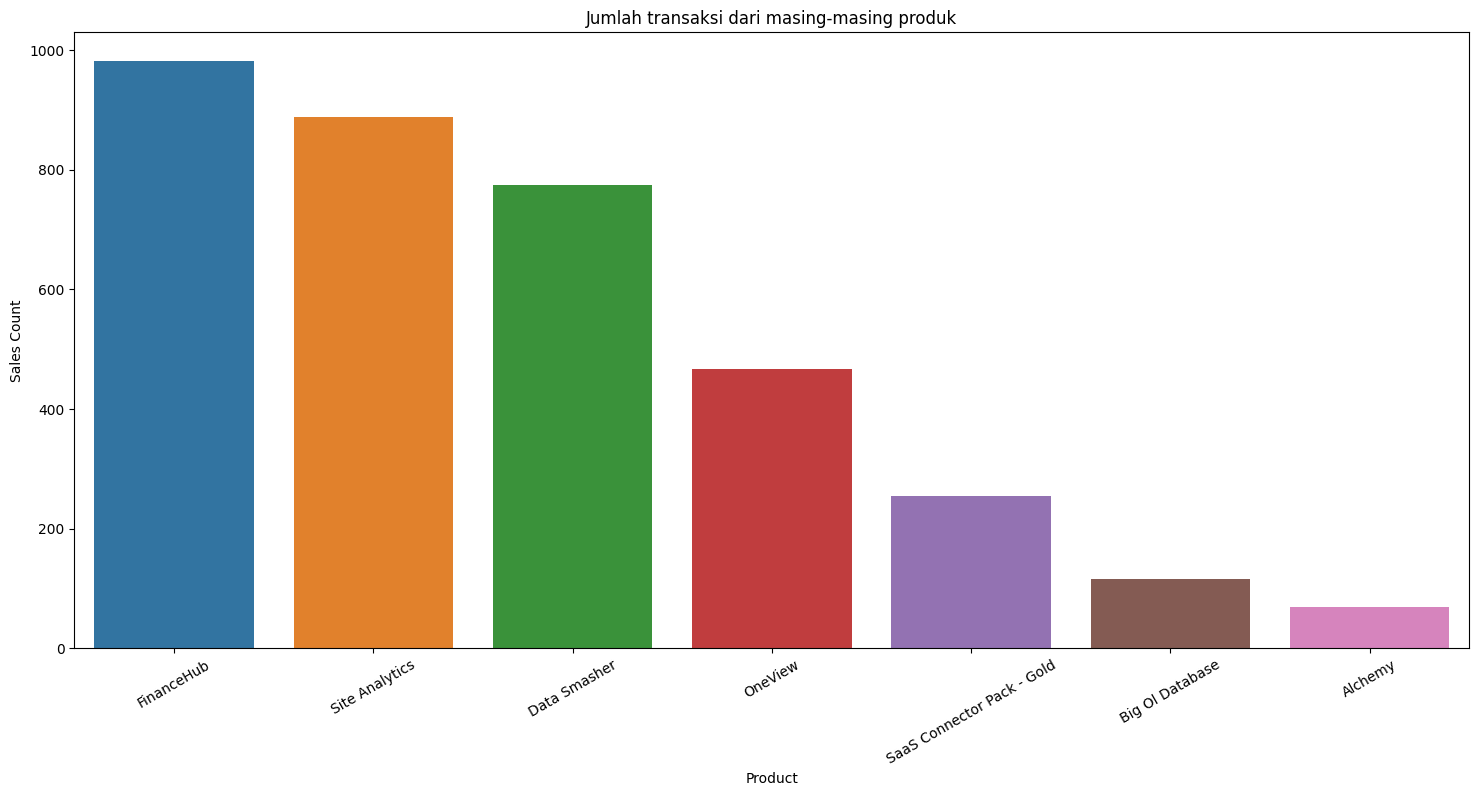

In [31]:
DFProd=DFProd[DFProd['Profit Mean']>25.54]
fig, ax = plt.subplots(figsize=(18, 8))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
sb.barplot(data=DFProd,x='Product',y='Sales Count',order=DFProd.sort_values('Sales Count',ascending=False)['Product'])\
.set(title='Jumlah transaksi dari masing-masing produk')

Dari grafik ini, Alchemy adalah produk yang paling jarang terjual meskipun rata-rata keuntungannya paling tinggi. Produk yang paling laris adalah FinanceHub, diikuti oleh Site Analytics dan Data Smasher.

<ipython-input-32-bbc3f573c8d2>:2: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(), rotation=30)


[Text(0.5, 1.0, 'Total keuntungan dari penjualan masing-masing produk')]

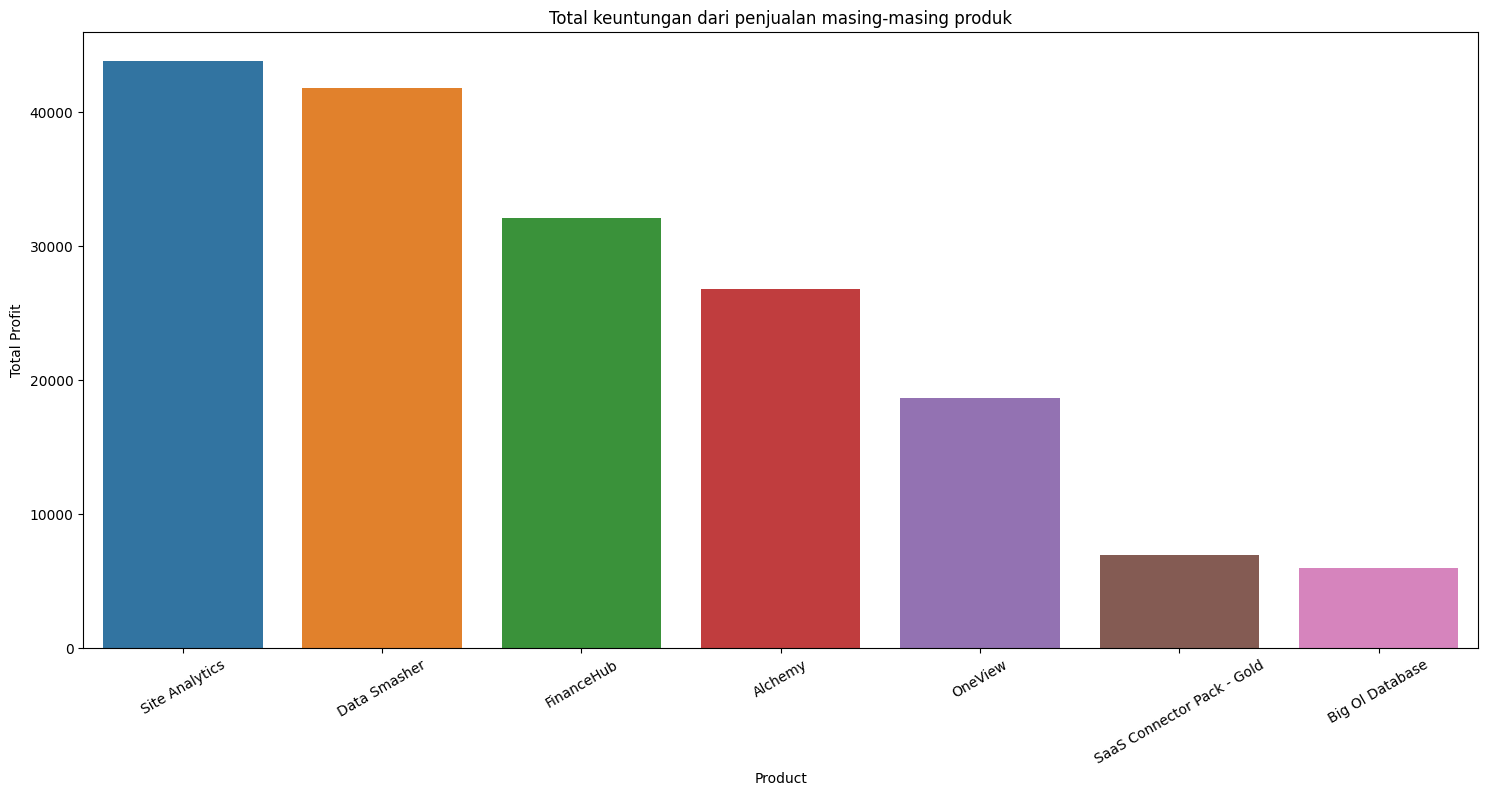

In [32]:
fig, ax = plt.subplots(figsize=(18, 8))
ax.set_xticklabels(ax.get_xticklabels(), rotation=30)
sb.barplot(data=DFProd,x='Product',y='Total Profit',order=DFProd.sort_values('Total Profit',ascending=False)['Product'])\
.set(title='Total keuntungan dari penjualan masing-masing produk')

Dari grafik ini, produk yang memberikan total keuntungan tertinggi adalah Site Analytics, diikuti oleh Data Smasher, kemudian FinanceHub.

Selanjutnya kita akan melihat pengaruh jumlah produk dalam satu transaksi terhadap keuntungan transaksi.

[Text(0.5, 1.0, 'Sebaran keuntungan berdasarkan jumlah produk')]

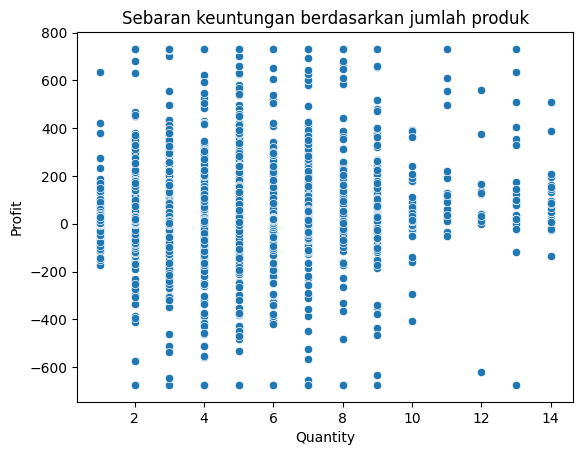

In [ ]:
sb.scatterplot(DF,x='Quantity',y='Profit').set(title='Sebaran keuntungan berdasarkan jumlah produk')

Dari grafik tersebut, tidak terlihat adanya hubungan antara jumlah produk dalam satu transaksi terhadap keuntungan dari transaksi tersebut. Kita juga tidak bisa menyimpulkan apakah ada perbedaan antara jumlah produk dari transaksi yang memberikan keuntungan lebih dari rata-rata keuntungan keseluruhan dan yang tidak. Karena itu, kita akan coba melakukan uji hipotesis.

In [ ]:
stats, pval=normaltest(DF['Quantity'])
if pval<=0.05:
    print('tidak normal') #Ha
else:
    print('distribusi normal') #Ho

tidak normal


Karena distribusinya bukan normal, kita akan lakukan uji U Mann-Whitney.

In [ ]:
stats,pval=mannwhitneyu(DF[DF['Profit']>0]['Quantity'],DF[DF['Profit']<=0]['Quantity'], alternative='greater')
if pval <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Gagal menolak Ho


Kita tidak punya cukup bukti untuk menyatakan bahwa ada perbedaan jumlah produk antara transaksi yang memberi keuntungan positif  dengan yang memberikan keuntungan nonpositif.

In [24]:
stats,pval=mannwhitneyu(DF[DF['Profit']>25.54]['Quantity'],DF[DF['Profit']<=25.54]['Quantity'], alternative='greater')
if pval <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


Tetapi, kita punya cukup bukti untuk mengatakan bahwa ada perbedaan jumlah produk antara transaksi yang memberi keuntungan lebih dari rata-rata keuntungan keseluruhan dan yang tidak. Kita akan coba melihat proporsi transaksi dengan keuntungan tinggi untuk masing-masing jumlah produk dalam satu transaksi.

In [27]:
DFQty=DF[['Quantity']].copy().drop_duplicates()
DFQty=pd.merge(DFQty,DF.groupby('Quantity').count()[['Profit']],on='Quantity')
DFQty.rename(columns={'Profit':'Number of Sales'},inplace=True)
DFQty=pd.merge(DFQty,DF[DF['Profit']>25.54].groupby('Quantity').count()[['Profit']],on='Quantity')
DFQty.rename(columns={'Profit':'High Profit Sales'},inplace=True)
DFQty['High Profit Sales %']=DFQty['High Profit Sales']/DFQty['Number of Sales']*100
DFQty.sort_values('Quantity')

,Quantity,Number of Sales,High Profit Sales,High Profit Sales %
7,1,899,89,9.899889
0,2,2402,450,18.734388
1,3,2409,609,25.280199
4,4,1191,345,28.967254
2,5,1230,437,35.528455
5,6,572,202,35.314685
3,7,606,249,41.089109
8,8,257,117,45.525292
6,9,258,134,51.937984
12,10,57,25,43.859649


[Text(0.5, 1.0, 'Persentase Transaksi Dengan Keuntungan Lebih dari Rata-rata Keseluruhan')]

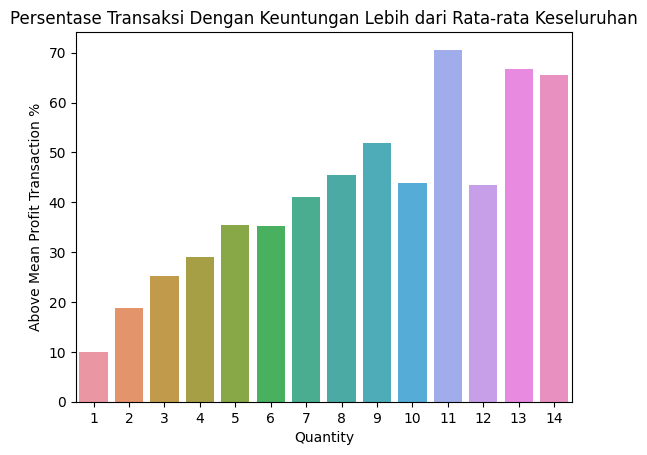

In [ ]:
sb.barplot(DFQty2,x='Quantity',y='Above Mean Profit Transaction %').set(title='Persentase Transaksi Dengan Keuntungan Lebih dari Rata-rata Keseluruhan')

Terlihat bahwa transaksi yang menjual lebih banyak produk sekaligus cenderung memberikan keuntungan yang lebih tinggi. Transaksi yang menjual 9, 11, 13, atau 14 produk sekaligus rata-rata keuntungannya lebih dari 25.54.

Selanjutnya kita akan melihat pengaruh besar diskon terhadap keuntungan.

<Axes: xlabel='Discount', ylabel='Profit'>

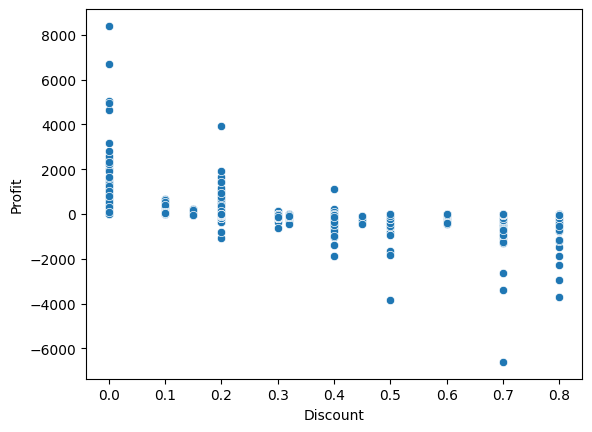

In [ ]:
sb.scatterplot(DF,x='Discount',y='Profit')

Dari grafik, terlihat adanya korelasi negatif antara diskon dan keuntungan; transaksi dengan diskon di bawah 40% cenderung memberikan keuntungan positif, sedangkan transaksi dengan diskon di atas 40% cenderung memberikan keuntungan negatif. Kita akan coba uji hipotesis tersebut.

In [41]:
stats, pval=normaltest(DF['Profit'])
if pval<=0.05:
    print('tidak normal') #Ha
else:
    print('distribusi normal') #Ho

tidak normal


Karena distribusinya bukan normal, kita lakukan uji U Mann-Whitney.

In [39]:
stats,pval=mannwhitneyu(DF[DF['Discount']>=0.4]['Profit'],DF[DF['Discount']<0.4]['Profit'], alternative='less')
if pval <= 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

Tolak Ho


Kita punya cukup bukti untuk mengatakan bahwa transaksi dengan diskon kurang dari 40% memberikan keuntungan yang lebih tinggi dari transaksi dengan diskon 40% atau lebih.

Pada bagian ini, Secara keseluruhan kita bisa menarik kesimpulan sebagai berikut:

*   Produk yang memberikan total keuntungan tertinggi, dengan rata-rata keuntungan lebih dari rata-rata keuntungan keseluruhan, adalah Site Analytics, Data Smasher, dan FinanceHub.
*   Transaksi yang menjual lebih banyak produk sekaligus cenderung memberikan keuntungan yang lebih tinggi.
*   Transaksi dengan diskon yang lebih kecil cenderung memberikan keuntungan yang lebih tinggi.

# Kesimpulan

Berdasarkan analisis yang telah dilakukan, kita bisa menyimpulkan kriteria dari transaksi yang memberikan keuntungan yang tinggi:

*   Berasal dari subregion NAMER, UKIR, atau APAC.
*   Berasal dari negara amerika serikat, inggris, kanada, brazil, dan spanyol. Lebih spesifiknya kota London, New York, Toronto, Los Angeles, Sao Paulo, dan Seattle.
*   Berasal dari industri manufacturing, energy, dan healthcare, khususnya perusahaan Valero Energy, Ford Motor, dan Siemens, serta perusahaan Kroger dan Bank of America Corp. yang termasuk di industri lain.
*   Menjual produk Site Analytics, Data Smasher, dan FinanceHub.
*   Menjual lebih banyak produk sekaligus.
*   Diskon kurang dari 40%.

Kesimpulan lain yang kita dapatkan adalah:

*   Dari total 9994 transaksi, 2728 transaksi memiliki keuntungan yang lebih tinggi dari rata-rata keuntungan
*   Jumlah transaksi dan total keuntungan cenderung naik tiap tahunnya, tapi rata-rata keuntungan turun di tahun 2022 dan 2023.
*   Tidak ada tren rata-rata keuntungan bulanan, tapi jumlah transaksi di akhir tahun cenderung lebih tinggi dari jumlah transaksi di awal tahun.
*   Subregion ANZ dan JAPN memiliki rata-rata dan total keuntungan negatif.
*   Marketing Suite memiliki rata-rata dan total keuntungan negatif.

## Rekomendasi

Berdasarkan kesimpulan di atas, diberikan beberapa rekomendasi

*   Fokuskan pemasaran di amerika serikat, inggris, kanada, brazil, dan spanyol, negara-negara lain di subregion NAMER, UKIR, dan APAC.
*   Fokuskan pemasaran pada perusahaan-perusahaan di industri manufacturing, energy, dan healthcare, khususnya perusahaan Valero Energy, Ford Motor, dan Siemens, serta perusahaan Kroger dan Bank of America Corp.
*   Fokuskan pemasaran produk Site Analytics, Data Smasher, dan FinanceHub.
*   Dalam bertransaksi, upayakan untuk menjual 9 atau lebih produk sekaligus, dan memberi diskon kurang dari 40%.
*   Fokuskan pemasaran pada akhir tahun.
*   Pertimbangkan untuk mencari pelanggan yang lebih menguntungkan dari subregion ANZ dan JAPN.
*   Pertimbangkan untuk memberhentikan produk Marketing Suite.
*   Melaksanakan analisis lebih lanjut dengan mempertimbangkan hubungan antar fitur.

Dengan rekomendasi tersebut, diharapkan perusahaan dapat menaikkan rata-rata dan total keuntungan.

